# Model validation for machine Learning in Python
**Author:** Oscar Hernández Terán                                           
**Date:** April 13, 2023

## What is Model Validation

Model validation consist in:

1. Ensuring your model performance as expected new data
2. Testing model performance on holdout datasets
3. Selecting the best model, parameters, and accuracy metrics
4. Achieving the best accuracy for the data given

### Basic modeling steps 

1. Model creation with type and parameters.
2. Fit the model using the dot-fit() method.
3. We generate predictions for data using the dot-predcit()  method.
4. We look the accuracy metrics.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
candy_df = pd.read_csv('data/candy-data.csv')
candy_df.head()

competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
0      100 Grand          1       0        1               0       0   
1   3 Musketeers          1       0        0               0       1   
2       One dime          0       0        0               0       0   
3    One quarter          0       0        0               0       0   
4      Air Heads          0       1        0               0       0   

   crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
0                 1     0    1         0         0.732         0.860   
1                 0     0    1         0         0.604         0.511   
2                 0     0    0         0         0.011         0.116   
3                 0     0    0         0         0.011         0.511   
4                 0     0    0         0         0.906         0.511   

   winpercent  
0   66.971725  
1   67.602936  
2   32.261086  
3   46.116505  
4   52.341465

## Regression models

### Random forest parameters

1. **n_stimators:** The number of the tress in the forest
2. **max_depth:** The maximun depth of the trees
3. **random_state:** Random seed 

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#### Regressor

In [44]:
rfr = RandomForestRegressor(random_state=1234)

In [45]:
candy_df = candy_df.drop(['competitorname'], axis=1)

X = candy_df.drop(['winpercent'], axis=1)
y = candy_df[['winpercent']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [46]:
# Set the number of trees
rfr.n_estimators = 100

# Add a maximum depth
rfr.max_depth = 6

# Set the random state
rfr.random_state = 1111

# Fit the model
rfr.fit(X_train, y_train)

/tmp/ipykernel_737591/1346963741.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


RandomForestRegressor(max_depth=6, random_state=1111)

In [47]:
# Fit the model using X and y
rfr.fit(X_train, y_train)

# Print how important each column is to the model
for i, item in enumerate(rfr.feature_importances_):
    # Use i and item to print out the feature importance of each column
    print("{0:s}: {1:.2f}".format(X_train.columns[i], item))

chocolate: 0.43
fruity: 0.04
caramel: 0.02
peanutyalmondy: 0.06
nougat: 0.01
crispedricewafer: 0.01
hard: 0.01
bar: 0.05
pluribus: 0.03
sugarpercent: 0.17
pricepercent: 0.17


/tmp/ipykernel_737591/1156508479.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


#### Classification

In [48]:
tic_tac_df = pd.read_csv('data/tic-tac-toe-endgame.csv')
tic_tac_df.head()

V1 V2 V3 V4 V5 V6 V7 V8 V9       V10
0  x  x  x  x  o  o  x  o  o  positive
1  x  x  x  x  o  o  o  x  o  positive
2  x  x  x  x  o  o  o  o  x  positive
3  x  x  x  x  o  o  o  b  b  positive
4  x  x  x  x  o  o  b  o  b  positive

In [49]:
columns_to_encode = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9']
tic_tac_df_encode = pd.get_dummies(data=tic_tac_df, columns=columns_to_encode, drop_first=True)
tic_tac_df_encode.head()

V10  V1_o  V1_x  V2_o  V2_x  V3_o  V3_x  V4_o  V4_x  V5_o  V5_x  V6_o  \
0  positive     0     1     0     1     0     1     0     1     1     0     1   
1  positive     0     1     0     1     0     1     0     1     1     0     1   
2  positive     0     1     0     1     0     1     0     1     1     0     1   
3  positive     0     1     0     1     0     1     0     1     1     0     1   
4  positive     0     1     0     1     0     1     0     1     1     0     1   

   V6_x  V7_o  V7_x  V8_o  V8_x  V9_o  V9_x  
0     0     0     1     1     0     1     0  
1     0     1     0     0     1     1     0  
2     0     1     0     1     0     0     1  
3     0     1     0     0     0     0     0  
4     0     0     0     1     0     0     0

In [50]:
rfc = RandomForestClassifier(random_state=1234)

In [51]:
X = tic_tac_df_encode.drop(['V10'], axis=1)
y = tic_tac_df_encode[['V10']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
# Fit the rfc model. 
rfc.fit(X_train, y_train)

# Create arrays of predictions
classification_predictions = rfc.predict(X_test)
probability_predictions = rfc.predict_proba(X_test)

# Print out count of binary predictions
print(pd.Series(classification_predictions).value_counts())

# Print the first value from probability_predictions
print('The second predicted probabilities are: {}'.format(probability_predictions[1]))

positive    216
negative    101
dtype: int64
The first predicted probabilities are: [0.03 0.97]


/tmp/ipykernel_737591/448151737.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


In [53]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=1111)

# Print the classification model
print(rfc)

# Print the classification model's random state parameter
print('The random state is: {}'.format(rfc.random_state))

# Print all parameters
print('Printing the parameters dictionary: {}'.format(rfc.get_params()))

RandomForestClassifier(max_depth=6, n_estimators=50, random_state=1111)
The random state is: 1111
Printing the parameters dictionary: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 1111, 'verbose': 0, 'warm_start': False}


In [54]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rfc = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=1111)

# Fit rfc using X_train and y_train
rfc.fit(X_train, y_train)

# Create predictions on X_test
predictions = rfc.predict(X_test)
print(predictions[0:5])

# Print model accuracy using score() and the testing data
print(rfc.score(X_test, y_test))

['positive' 'positive' 'positive' 'negative' 'negative']
0.9400630914826499


/tmp/ipykernel_737591/3148412243.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


## Creating train, test and validation datasets

In [55]:
tic_tac_toe = pd.read_csv('data/tic-tac-toe-endgame.csv')

In [56]:
# Create dummy variables using pandas
X = pd.get_dummies(tic_tac_toe.iloc[:, 0:9])
y = tic_tac_toe.iloc[:, 9]

# Create training and testing datasets. Use 10% for the test set
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.10, random_state=1111)

In [57]:
# Create temporary training and final testing datasets
X_temp, X_test, y_temp, y_test  =\
    train_test_split(X, y, test_size=0.20, random_state=1111)

# Create the final training and validation datasets
X_train, X_val, y_train, y_val  =\
    train_test_split(X_temp, y_temp, test_size=0.25, random_state=1111)


## Accuracy metrics: Regression models

**Mean absolute error:**
$$
MAE = \frac{\sum_{i=1}^{n} |y_i - \hat{y}_i|}{n}
$$

- Simplest ans most intuitive metric
- Treats all points equally
- Not sensitive to outliers

**Mean squared error (MSE):**

$$
MSE = \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{n}
$$

- Most widely used regression metric 
- Allows outlier errors to contribute more the overall error
- Random family road trips could lead to large  errors in predictions

In [58]:
# Use only one feature
from sklearn import datasets, linear_model
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [59]:
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)


In [60]:
from sklearn.metrics import mean_absolute_error

# Manually calculate the MAE
n = len(diabetes_y_pred)
mae_one = sum(abs(diabetes_y_test - diabetes_y_pred)) / n
print('With a manual calculation, the error is {}'.format(mae_one))

# Use scikit-learn to calculate the MAE
mae_two = mean_absolute_error(diabetes_y_test, diabetes_y_pred)
print('Using scikit-learn, the error is {}'.format(mae_two))

With a manual calculation, the error is 41.22709128976145
Using scikit-learn, the error is 41.22709128976145


In [61]:
from sklearn.metrics import mean_squared_error

n = len(diabetes_y_pred)
# Finish the manual calculation of the MSE
mse_one = sum((diabetes_y_test - diabetes_y_pred)**2) / n
print('With a manual calculation, the error is {}'.format(mse_one))

# Use the scikit-learn function to calculate MSE
mse_two = mean_squared_error(diabetes_y_test, diabetes_y_pred)
print('Using scikit-learn, the error is {}'.format(mse_two))

With a manual calculation, the error is 2548.0723987259694
Using scikit-learn, the error is 2548.07239872597


### Classification metrics

- Precision
- Recall (also called sensivity)
- Accuracy
- Specificity
- F-1 Score, and its variations

**Accuracy:**
$$
AC = \frac{TP+TN}{TP+TN+FP+FN}
$$

**Precision:**
$$
PR = \frac{TP}{TP+TN}
$$

**Recall:**
$$
RC = \frac{TP}{TP+FN}

In [62]:
# Calculate and print the accuracy
accuracy = (324 + 491) / (953)
print("The overall accuracy is {0: 0.2f}".format(accuracy))

# Calculate and print the precision
precision = (491) / (491 + 15)
print("The precision is {0: 0.2f}".format(precision))

# Calculate and print the recall
recall = (491) / (491 + 123)
print("The recall is {0: 0.2f}".format(recall))

The overall accuracy is  0.86
The precision is  0.97
The recall is  0.80


In [63]:
# Load the data
tic_tac_df = pd.read_csv('data/tic-tac-toe-endgame.csv')
tic_tac_df.head()

# One hot Encoding
columns_to_encode = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9']
tic_tac_df_encode = pd.get_dummies(data=tic_tac_df, columns=columns_to_encode, drop_first=True)
tic_tac_df_encode.head()

# Train-test split
X = tic_tac_df_encode.drop(['V10'], axis=1)
y = tic_tac_df_encode[['V10']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

[[ 86  16]
 [  3 212]]


/tmp/ipykernel_737591/124179688.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


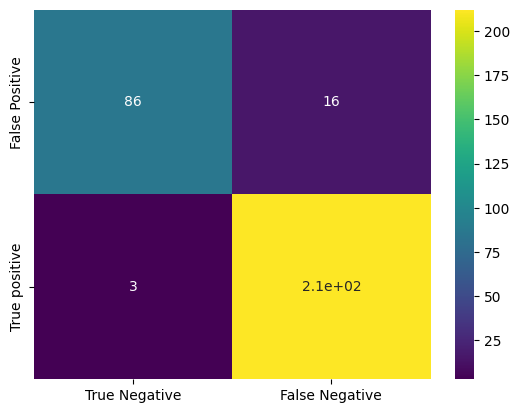

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Create a random forest classifier
rfc = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=1111)

# Fit rfc using X_train and y_train
rfc.fit(X_train, y_train)

# Create predictions on X_test
predictions = rfc.predict(X_test)

# Create and print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

sns.heatmap(pd.DataFrame(cm, columns=['True Negative', 'False Negative'], index=['False Positive', 'True positive']), 
            annot=True, cmap='viridis')
plt.show()



In [65]:
y_test = pd.get_dummies(data=y_test, drop_first=True)
predictions = pd.get_dummies(data=predictions, drop_first=True)

In [66]:
from sklearn.metrics import precision_score, accuracy_score, recall_score

# Create precision or recall score based on the metric you imported
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)

# Print the final result
print("The precision value is {0:.2f} \n".format(precision))
print("The recall value is {0:.2f} \n".format(recall))
print("The accuracy value is {0:.2f} \n".format(accuracy))

The precision value is 0.93 

The recall value is 0.99 

The accuracy value is 0.94 



## The bias-variance tradeoff

**Variance:**
Following the training data too closely
- Fails to generalize to the test data
- Low training error but high testing error
- Occurs when models are overfit and have high complexity

Overfitting models (high variance)

**Bias:**
Failing to find the relationship between the data and the response
- High training/test error
- Occurs when models are underfit

Underfitting models (high bias)

## The problems with holdout sets

In [67]:
# Create two different samples of 200 observations 
sample1 = tic_tac_df.sample(200, random_state=1111)
sample2 = tic_tac_df.sample(200, random_state=1171)

# Print the number of common observations 
print(len([index for index in sample1.index if index in sample2.index]))

# Print the number of observations in the Class column for both samples 
print(sample1['V10'].value_counts())
print(sample2['V10'].value_counts())

40
positive    134
negative     66
Name: V10, dtype: int64
positive    123
negative     77
Name: V10, dtype: int64


## Cross-Validation

In [68]:
from sklearn.model_selection import KFold

# Use KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1111)

# Create splits
splits = kf.split(X)

# Print the number of indices
for train_index, val_index in splits:
    print("Number of training indices: %s" % len(train_index))
    print("Number of validation indices: %s" % len(val_index))

Number of training indices: 766
Number of validation indices: 192
Number of training indices: 766
Number of validation indices: 192
Number of training indices: 766
Number of validation indices: 192
Number of training indices: 767
Number of validation indices: 191
Number of training indices: 767
Number of validation indices: 191


In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfc = RandomForestRegressor(n_estimators=25, random_state=1111)

# Access the training and validation indices of splits
for train_index, val_index in splits:
    # Setup the training and validation data
    X_train, y_train = X[train_index], y[train_index]
    X_val, y_val = X[val_index], y[val_index]
    # Fit the random forest model
    rfc.fit(X_train, y_train)
    # Make predictions, and print the accuracy
    predictions = rfc.predict(X_val)
    print("Split accuracy: " + str(mean_squared_error(y_val, predictions)))

In [70]:
# Instruction 1: Load the cross-validation method
from sklearn.model_selection import cross_val_score

# Instruction 2: Load the random forest regression model
from sklearn.ensemble import RandomForestRegressor

# Instruction 3: Load the mean squared error method
# Instruction 4: Load the function for creating a scorer
from sklearn.metrics import mean_squared_error, make_scorer

In [71]:
# Load the data
tic_tac_df = pd.read_csv('data/tic-tac-toe-endgame.csv')
tic_tac_df.head()

# One hot Encoding
columns_to_encode = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10']
tic_tac_df_encode = pd.get_dummies(data=tic_tac_df, columns=columns_to_encode, drop_first=True)

# Train-test split
X = tic_tac_df_encode.drop(['V10_positive'], axis=1)
y = tic_tac_df_encode[['V10_positive']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [72]:
rfc = RandomForestRegressor(n_estimators=25, random_state=1111)
mse = make_scorer(mean_squared_error)

# Set up cross_val_score
cv = cross_val_score(estimator=rfc,
                     X=X_train,
                     y=y_train,
                     cv=10,
                     scoring=make_scorer(mean_squared_error))

# Print the mean error
print(cv.mean())

/home/oscarteran/Documentos/machinelearning/venv-ml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/oscarteran/Documentos/machinelearning/venv-ml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/oscarteran/Documentos/machinelearning/venv-ml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/oscarteran

0.029785346153846155


/home/oscarteran/Documentos/machinelearning/venv-ml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/oscarteran/Documentos/machinelearning/venv-ml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/oscarteran/Documentos/machinelearning/venv-ml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


### Leave-one-out-cross-validation (LOOCV)

In [73]:
from sklearn.metrics import mean_absolute_error, make_scorer

# Create scorer
mae_scorer = make_scorer(mean_absolute_error)

rfr = RandomForestRegressor(n_estimators=15, random_state=1111)

# Implement LOOCV
scores = cross_val_score(rfr, X=X, y=y, cv=y.shape[0], scoring=mae_scorer)

# Print the mean and standard deviation
print("The mean of the errors is: %s." % np.mean(scores))
print("The standard deviation of the errors is: %s." % np.std(scores))

/home/oscarteran/Documentos/machinelearning/venv-ml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/oscarteran/Documentos/machinelearning/venv-ml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/oscarteran/Documentos/machinelearning/venv-ml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/oscarteran

The mean of the errors is: 0.056089074460681974.
The standard deviation of the errors is: 0.11290810335881223.


/home/oscarteran/Documentos/machinelearning/venv-ml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/oscarteran/Documentos/machinelearning/venv-ml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


## Tunning hyperparameters

In [74]:
from sklearn.metrics import mean_absolute_error, make_scorer

# Create scorer
mae_scorer = make_scorer(mean_absolute_error)

rfr = RandomForestRegressor(n_estimators=15, random_state=1111)

# Implement LOOCV
scores = cross_val_score(rfr, X=X, y=y, cv=y.shape[0], scoring=mae_scorer)

# Print the mean and standard deviation
print("The mean of the errors is: %s." % np.mean(scores))
print("The standard deviation of the errors is: %s." % np.std(scores))

/home/oscarteran/Documentos/machinelearning/venv-ml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/oscarteran/Documentos/machinelearning/venv-ml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/oscarteran/Documentos/machinelearning/venv-ml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/oscarteran

The mean of the errors is: 0.056089074460681974.
The standard deviation of the errors is: 0.11290810335881223.


/home/oscarteran/Documentos/machinelearning/venv-ml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [75]:
# Review the parameters of rfr
print(rfr.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_jobs': None, 'oob_score': False, 'random_state': 1111, 'verbose': 0, 'warm_start': False}


In [76]:
from sklearn.ensemble import RandomForestRegressor
import random

# Maximum Depth
max_depth = [4, 8, 12]
# Minimum samples for a split
min_samples_split = [2, 5, 10]
# Max features 
max_features = [4, 6, 8, 10]

# Fill in rfr using your variables
rfr = RandomForestRegressor(
    n_estimators=100,
    max_depth=random.choice(max_depth),
    min_samples_split=random.choice(min_samples_split),
    max_features=random.choice(max_features))

# Print out the parameters
print(rfr.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 4, 'max_features': 6, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


### RandomizedSearchCV

**Better Methods:**
- Random searching --
- Bayesian optimization

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error

# Finish the dictionary by adding the max_depth parameter
param_dist = {"max_depth": [2, 4, 6, 8],
              "max_features": [2, 4, 6, 8, 10],
              "min_samples_split": [2, 4, 8, 16]}

# Create a random forest regression model
rfr = RandomForestRegressor(n_estimators=10, random_state=1111)

# Create a scorer to use (use the mean squared error)
scorer = make_scorer(mean_squared_error)

In [78]:
# Import the method for random search
from sklearn.model_selection import RandomizedSearchCV

# Build a random search using param_dist, rfr, and scorer
random_search =\
    RandomizedSearchCV(
        estimator=rfr,
        param_distributions=param_dist,
        n_iter=10,
        cv=5,
        scoring=scorer)

### Selecting your final model

In [79]:
from sklearn.metrics import precision_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV

# Create a precision scorer
precision = make_scorer(precision_score)
# Finalize the random search
rs = RandomizedSearchCV(
  estimator=rfc, param_distributions=param_dist,
  scoring = precision,
  cv=5, n_iter=10, random_state=1111)
rs.fit(X, y)

# print the mean test scores:
print('The accuracy for each run was: {}.'.format(rs.cv_results_['mean_test_score']))
# print the best model score:
print('The best accuracy for a single model was: {}'.format(rs.best_score_))

/home/oscarteran/Documentos/machinelearning/venv-ml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/oscarteran/Documentos/machinelearning/venv-ml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/oscarteran/Documentos/machinelearning/venv-ml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/oscarteran/Documentos/machinelearning/venv-ml/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/home/oscarteran/Documen

The accuracy for each run was: [nan nan nan nan nan nan nan nan nan nan].
The best accuracy for a single model was: nan


/home/oscarteran/Documentos/machinelearning/venv-ml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/oscarteran/Documentos/machinelearning/venv-ml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/oscarteran/Documentos/machinelearning/venv-ml/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/home/oscarteran/Documentos/machinelearning/venv-ml/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/oscarteran/Documentos/machinelearning/venv-ml/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1954, in precision